In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer

%matplotlib inline

%run utils.py
%run plots.py

In [2]:
X, y = load_fraud_data()

## Fitting a model

In [3]:
kneighbors = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3,5,8,9,10,11,12,15],
    'weights': ('uniform', 'distance'),
    'algorithm': ('auto', 'ball_tree', 'kd_tree')
}
clf = GridSearchCV(kneighbors,
                   param_grid=parameters,
                   cv=StratifiedKFold(n_splits=5),
                   scoring=make_scorer(score_evaluation))

model = clf.fit(X, y)

print('best params', model.best_params_)
print('score', model.score(X, y))

best params {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}
score -520


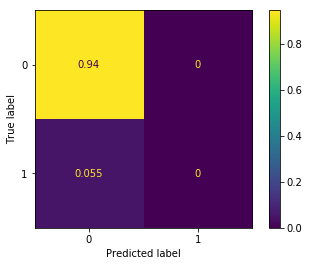

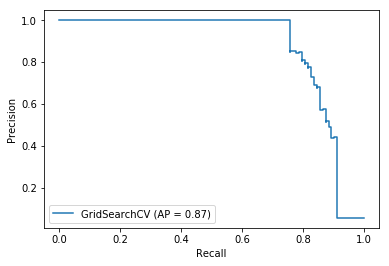

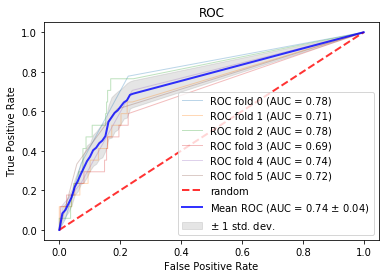

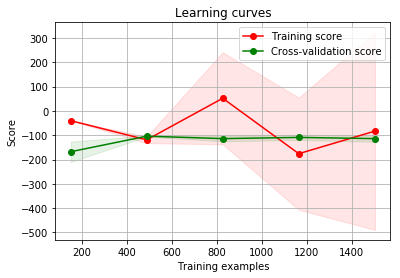

In [4]:
plot_classifier(clf, X, y)

max score: -125.55555555555556
threshold: 0.56


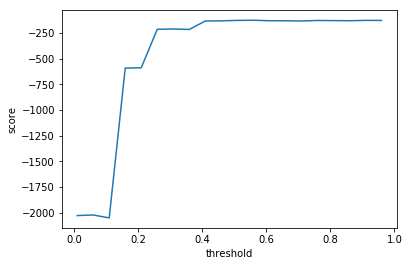

In [5]:
def predictor(X_test):
    return model.predict_proba(X_test)[:,1]

max_score, best_threshold = find_best_thresh(predictor, X, y)

## Final score

In [6]:
get_test_score(predictor, best_threshold)

-118635